<center>
<h4>Diplomatura en CDAAyA 2020 - FaMAF - UNC</h4>
<h1>¿Caro o Barato? Análisis de Precios de Almacen en un Contexto Inflacionario</h1>
<h3>Aprendizaje Automático No Supervisado</h3>
</center>
</left>
<h4>Sofía Luján y Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el cuarto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos (EDA) al dataset, de modo de encontrar patrones sistematizables. A los fines de este práctico, *nos enfocaremos en clasificar los productos y la búsqueda de valores atípicos (outliers).*

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

random_state = 0
np.random.seed(0)  # Para mayor determinismo

/home/fede-sepu/.cache/pypoetry/virtualenvs/p-diplo-YEy-h2h9-py3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 50)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático No Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset crudo. El preprocesamiento será similar al aplicado en los prácticos anteriores.

#### 1. Obtención del Dataset

Cargar el conjunto de datos original. 

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el práctico anterior.

#### 3. Creación de Nuevos Atributos

En esta etapa, pueden adicionar atributos calculados a partir de los datos preexistentes, que crean que son pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con `precio relativo`. Por ejemplo, el precio relativo del período anterior.

#### 4. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 5. Mezca Aleatória y División en Train/Test

Finalmente, es recomendable que mezclen los datos aleatoriamente, dado que la inicialización influye en los resultados del modelo que se propone que implementen.

Respecto a la división en Train/Test, dado que se trata de un algoritmo de aprendizaje automático no supervisado, pueden omitir esta división, ya que estamos buscando patrones ocultos en los datos que reflejen las causas latentes.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar, por un lado, una técnica de reducción de dimensionalidad para representar los datos y, por el otro, dos técnicas de clusterización.

#### 1. Descomposición de Variables: Principal Component Analysis

Si bien la mayoría de nuestros atributos se tratan de variables binarias y PCA no es tan apropiado para este tipo de datasets, puede aplicarse esta técnica y ver que resulta.
A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

Adicionalmente, existe una técnica llamada Factor Analysis que puede ser más apropiada para este caso. Aplicarla y obtener conclusiones. Comparar con los resultados obtenidos previamente.

#### 2. K-Means Clustering
Aplicar K-Means tanto al dataset original como al dataset transformado a partir de cualquiera de las técnicas anteriores.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

- Calcular las métricas pertinentes sobre los clusters resultantes.
- Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
- Agregar al dataset original el cluster resultante de los modelos.
- Graficar diferentes variables de interés por cluster y compararlos.
- Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.
- Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.
- Graficar la silhouette utilizando distancia Manhattan. [Definición](https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20value%20is%20a,poorly%20matched%20to%20neighboring%20clusters) y 
[Doc+Ejemplo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

#### 3. HDBScan en cada cluster para detectar anomalías.

[Lib and Doc](https://hdbscan.readthedocs.io/en/latest/) y
[Más Doc](https://towardsdatascience.com/understanding-hdbscan-and-density-based-clustering-121dbee1320e)

Este algoritmo es de clusterización apropiado para detectar anomalias (outliers). El resultado deberían ser un set de productos caros o baratos dentro de cada cluster identificado en la etapa anterior.

---
### III. Opcional - Tareas Adicionales

1. Incluir clusters como una nueva feature en el modelo seleccionado en el práctico de aprendizaje supervisado. A partir de esto, obtener conclusiones de acuerdo al error de predicción. **Productos caros**: aquellos con error de predicción positivo alto. **Productos baratos**: aquellos con error de predicción negativo alto. ¿Tiene sentido?

2. Al obtener la predicción del precio, se llega al **precio relativo estimado**. Hacer la transformación inversa para identificar cuál debería ser el precio nominal de ese producto particular. ¿Qué dato necesitamos conocer si estamos prediciendo los precios de hoy?

3. Probar los modelos con los nuevos datos disponibilizados.


### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y las técnicas implementadas, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Sintetizar las conclusiones en un archivo de texto, como lo vienen haciendo con los anteriores prácticos.

**Fecha de Entrega: 13/10**

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [ ]:
'''# Cargamos el dataset original en una variable
precios_20200412_20200413 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200412_20200413.csv')
precios_20200419_20200419 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200419_20200419.csv')
precios_20200426_20200426 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200426_20200426.csv')
precios_20200502_20200503 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200502_20200503.csv')
precios_20200518_20200518 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200518_20200518.csv')

productos = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/productos.csv')
sucursales = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/sucursales.csv')
'''
#productos.head()
#precios_20200518_20200518.head()

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [ ]:
# %run -i precioclaros_ultimo.py

In [ ]:
#from google.colab import files
#files.upload()
#from google.colab import drive
#drive.mount('/content/drive/')

In [ ]:
#pip install pickle5

In [ ]:
import gzip
import pickle5 as pickle

with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)
#df= df.sample(frac=0.1, replace=False)
#df=df.drop(['precioRelativo',	'priorPrecioRelativo','total_dummies','otras_palabras'],axis=1)
#ds=df.copy()
df.head()

In [3]:
file ='sucursal_producto_precio_v2.pkl'

In [4]:
df = pd.read_pickle(file)

In [5]:
df.sample(2)

,precio,producto_id,sucursal_id,fecha,marca,nombre,presentacion,categoria1,categoria2,categoria3,presentacion_depurada,um_depurada,cantidad_depurada,nombre_depurado,presentacion_en_nombre,factor_homogenea,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_tinto,dummy_crema,dummy_jabon,dummy_blanco,dummy_polvo,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_malbec,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_tono,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_cabernet,dummy_te,dummy_coloracion,dummy_cerveza,dummy_saquitos,dummy_cremoso,dummy_sabor,dummy_trozado,...,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_gatos,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,marcas_frecuentes,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_colgate,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_glade,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pampers,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,cantidad,unidad,precioXUnidad,nuevaUnidad,media,mediana,desvio,q1,q3,IQR,comercioId,banderaId,banderaDescripcion,comercioRazonSocial,provincia,localidad,direccion,lat,lng,sucursalNombre,sucursalTipo,Unnamed:_0,nom_provincia,region,dummy_region_centro,dummy_region_cuyo,dummy_region_norte_grande,dummy_region_patagonia,sucursal_id_2,bienNumerico,precioRelativo
1266441,179.4,7791600018450,1-1-7,2020-04-26,kevin,Desodorante Aerosol Kevin Black 250 Cc,250.0 cc,NaN,NaN,NaN,250.0 cc,cc,250.0,desodorante aerosol black,True,4.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3,3,0,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,250.0,cc,717.60,lt,825.271429,817.98,74.977850,756.000,911.600,155.60,1,1,Super MAMI,Dinosaurio S.A.,AR-X,SALSIPUEDES,E53 1011 None,-31.126667,-64.295250,Super Mami 4,hipermercado,NaN,cordoba,centro,1,0,0,0,117,920.15400,0.779869
681620,431.0,7791519702921,10-1-32,2020-04-26,prime,Preservativos Skyn Extra Lubricado Prime 6 Un,6.0 un,NaN,NaN,NaN,6.0 un,un,6.0,preservativos skyn extra lubricado,True,0.167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4,2,1,otras,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6.0,un,71.83,un,75.082857,78.92,12.721277,67.165,85.915,18.75,10,1,Hipermercado Carrefour,INC S.A.,AR-S,Rosario,C. Pellegrini 3250,-32.951847,-60.670442,Rosario Centro,hipermercado,NaN,santa fe,centro,1,0,0,0,10132,974.59625,0.073702


### 3. Creación de Nuevos Atributos

Decisiones al respecto:

In [6]:
gsort=df.sort_values(by=['producto_id','sucursal_id','fecha'],ascending=False)
g = gsort.groupby(['producto_id','sucursal_id']).nth(-2).reset_index()

In [7]:
aux = g[['producto_id','sucursal_id','precioRelativo']]
aux = aux.rename(columns = {'precioRelativo': 'priorPrecioRelativo'}, inplace = False)

In [8]:
df = pd.merge(df,aux,how='left')

In [9]:
gsort_media=df.sort_values(by=['nom_provincia','producto_id','fecha'],ascending=False)
g_media = gsort_media.groupby(['nom_provincia','producto_id']).nth(-2).reset_index()

In [10]:
aux_media = g_media[['nom_provincia','producto_id','media']]
aux_media = aux_media.rename(columns = {'media': 'priorMedia'}, inplace = False)
df = pd.merge(df,aux_media,how='left')
df['priorPrecioRelativo'] = df['priorPrecioRelativo'].fillna(df['priorMedia']/df['bienNumerico'],inplace=False)

In [11]:
df['priorPrecioRelativo'] = df['priorPrecioRelativo'].fillna(df['media']/df['bienNumerico'],inplace=False)

In [12]:
df = df.drop(columns=['Unnamed:_0','producto_id','precioXUnidad','sucursal_id','sucursal_id_2','precio','bienNumerico','cantidad','unidad','nuevaUnidad','media','priorMedia','mediana','desvio','q1','q3','IQR','comercioId','banderaId','banderaDescripcion','comercioRazonSocial','provincia','localidad','direccion','lat','lng','sucursalNombre','sucursalTipo','fecha','marca','nombre','presentacion','presentacion_depurada','um_depurada','cantidad_depurada','nombre','presentacion_en_nombre','factor_homogenea','nom_provincia','region', 'categoria1','categoria2', 'categoria3', 'marcas_frecuentes'], axis=1)

In [13]:
df = df.drop(columns=['dummy_entero',
 'dummy_marca_pampers',
 'dummy_antitranspirante',
 'dummy_marca_glade',
 'dummy_perros',
 'dummy_tono',
 'dummy_region_patagonia',
 'dummy_region_cuyo',
 'dummy_cabernet',
 'dummy_brut',
 'dummy_malbec',
 'dummy_polvo',
 'dummy_oliva',
 'dummy_marca_colgate',
 'dummy_gatos',
 'dummy_gas',
 'dummy_vacio',
 'dummy_saquitos',
 'dummy_region_cuyo',
 'dummy_rubia',
 'dummy_tinto',
 'dummy_verdes',
 'dummy_fritas',
 'dummy_higienico',
 'dummy_tono',
 'dummy_mate',
 'dummy_port'],axis = 1)

In [14]:
df.sample(2)

,nombre_depurado,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,...,dummy_claro,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo
878672,locion facial hidratante fps,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7.553744,7.309669
1181109,asado americano,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.434425,0.434425


### 4. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [ ]:
# Pueden utilizar los siguientes métodos, por ejemplo:

#min_max_scaler = preprocessing.MinMaxScaler()
#standard_scaler = preprocessing.StandardScaler() # preferimos utilizar este ya que fue recomendado en clase
#df=min_max_scaler.fit_transform(df)

In [15]:
name_var = df.priorPrecioRelativo
scaler = preprocessing.MinMaxScaler().fit(name_var.values.reshape(-1, 1))
feature = scaler.transform(name_var.values.reshape(-1, 1))
df['priorPrecioRelativo'] = feature

name_var = df.precioRelativo
scaler = preprocessing.MinMaxScaler().fit(name_var.values.reshape(-1, 1))
feature = scaler.transform(name_var.values.reshape(-1, 1))
df['precioRelativo'] = feature

In [16]:
df.sample(5)

,nombre_depurado,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,...,dummy_claro,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo
1732627,acondicionador liso extremo max pro v,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.001669,0.001661
1951924,jabon hidratante kar vainilla,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001802,0.001825
1167872,ketchup tomate hellmanns,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000668,0.000687
1829812,palillero copetin animales,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000205,0.000202
2000785,enjuague bucal cool mint,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

### 5. Mezca Aleatória y División en Train/Test

Mezclar los datos aleatoriamente. Luego, si les parece necesario, dividir en Train/Test el dataset.

In [17]:
# Para mezclar aleatoriamente el dataset, utilizar el siguiente módulo:

#df_shuff = shuffle(df)
#df = shuffle(df)
# No se hace división en train y test
df = shuffle(df)
df=df.iloc[0:3000]

## II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Utilizando los datos obtenidos, se aplicarán técnicas de reducción de dimensionalidad y el modelo K-Means de Clustering.

### 1. Descomposivión de Variables: Principal Component Analysis

A continuación se aplicará la técnica de descomposición por Análisis de Componente Principal (PCA).

In [21]:
df2 = df.copy()
#Se elimina la variable nombre_depurado para poder acceder a las componentes pca
df = df.drop(columns=['nombre_depurado'],axis=1)

In [22]:
# Utilizar diferentes valores para el parámetro n_components

pca = PCA(n_components=100)
pca_ind = pca.fit_transform(df)

In [23]:
pca_ind.shape

(3000, 100)

In [24]:
from sklearn.decomposition import non_negative_factorization
W, H, n_iter = non_negative_factorization(df, n_components=100, init='random')

/home/fede-sepu/.cache/pypoetry/virtualenvs/p-diplo-YEy-h2h9-py3.7/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [25]:
from sklearn.decomposition import TruncatedSVD
TSVD = TruncatedSVD(df, n_components=100)

In [26]:
len(pca.explained_variance_ratio_)

100

In [27]:
# proporción de varianza
print('Proporción de varianza por componente, para %s' %len(pca.explained_variance_ratio_),'componentes: ', pca.explained_variance_ratio_)
# proporción de varianza acumulada
print ('Proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())
#El maximo de varianza que explicamos con PCA es 60 cuando tenemos 100 componentes.

Proporción de varianza por componente, para 100 componentes:  [0.37935673 0.15210018 0.07159481 0.05181424 0.02891472 0.02567511
 0.01447055 0.01235326 0.00825375 0.00775847 0.00733052 0.00722131
 0.00695312 0.00650412 0.0055848  0.00506266 0.00489181 0.0045481
 0.00442119 0.0043439  0.00418729 0.00389922 0.00359641 0.00338252
 0.00318277 0.00313954 0.00299657 0.00294763 0.00291414 0.00282811
 0.00278402 0.00268002 0.00263395 0.00251756 0.00246113 0.00240117
 0.00234697 0.00229938 0.0022515  0.00223202 0.00220383 0.00216862
 0.00213558 0.0020955  0.00209348 0.00199119 0.00197171 0.00194217
 0.00191396 0.00188008 0.00183823 0.00181038 0.00176513 0.00173097
 0.00171907 0.00168183 0.00165114 0.00162827 0.00161297 0.00160216
 0.0015682  0.00153141 0.00151083 0.00147794 0.00145441 0.00144178
 0.00143364 0.00141886 0.00140247 0.00138657 0.00135835 0.00134432
 0.00127994 0.0012764  0.00126173 0.00123203 0.00119806 0.00118131
 0.00117388 0.00116089 0.00114188 0.00112439 0.00111056 0.00109895
 

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

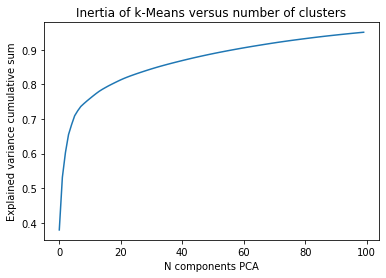

In [28]:
#len(pca.explained_variance_ratio_)
from matplotlib import pyplot as pl
plt.plot(np.arange(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_.cumsum())
plt.xlabel('N components PCA')
plt.ylabel("Explained variance cumulative sum")
plt.title("Inertia of k-Means versus number of clusters")

Text(0.5, 1.0, 'Increase for explained variance')

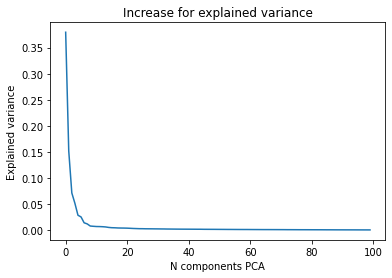

In [29]:
#len(pca.explained_variance_ratio_)
plt.plot(np.arange(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('N components PCA')
plt.ylabel("Explained variance")
plt.title("Increase for explained variance")

In [30]:
# Considerando que en torno a 25 componentes se explica la mayor parte de la varianza, se realiza un nuevo PCA con esa cantidad de componentes
# Para poder trabajar con un DF más pequeño.
pca = PCA(n_components=30)
pca_ind = pca.fit_transform(df)

In [31]:
fa = FactorAnalysis(n_components=7, random_state=0)
df_fa = fa.fit_transform(df)

In [32]:
df_fa

array([[ 1.21964052, -0.51276441, -0.06611062, ..., -0.84867568,
        -0.86664901, -0.0649506 ],
       [ 1.21964052, -0.51276441, -0.06611061, ...,  1.06845949,
         1.32959632,  0.86743069],
       [ 0.25229542,  2.57512519, -0.19244753, ..., -0.97070287,
         1.4708753 , -0.04413272],
       ...,
       [ 0.25229542,  2.57512519, -0.19244753, ...,  0.62704865,
         0.06259585,  0.16433616],
       [-0.94818853, -0.2989835 , -0.04751204, ..., -1.49036372,
         0.1273204 ,  0.07844409],
       [ 1.21964052, -0.51276441, -0.06611061, ...,  1.82125018,
        -0.59375518,  0.17190321]])

Si se animan, pueden usar una red neuronal como encoder para la reducción de dimensionalidad.

***Hint: *** [En el siguiente link](https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b)

### 2.  K-Means Clustering

A continuación se aplicará K-Means para clasificar en clusters nuestros datasets.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

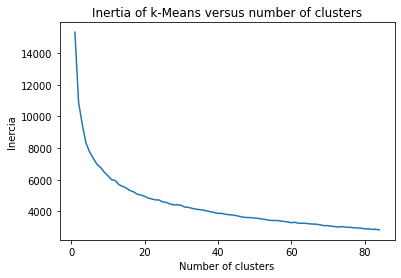

In [33]:
# Sobre la transformación por PCA aplicamos método de Elbow para identificar el número de clusters óptimo
n = 85
inercia = []
list_k = list(range(1, n))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(pca_ind)
    inercia.append(km.inertia_)
    
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a n clusters
# scores = [KMeans(n_clusters=i+2).fit(df).inertia_ for i in range(n)
from matplotlib import pyplot as plt
plt.plot(np.arange(1, n), inercia)
plt.xlabel('Number of clusters')
plt.ylabel("Inercia")
plt.title("Inertia of k-Means versus number of clusters")

In [34]:
# Sobre la transformación por PCA aplicamos método de Elbow para identificar el número de clusters óptimo
n = 40
inercia = []
list_k = list(range(15, n))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(pca_ind)
    inercia.append(km.inertia_)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

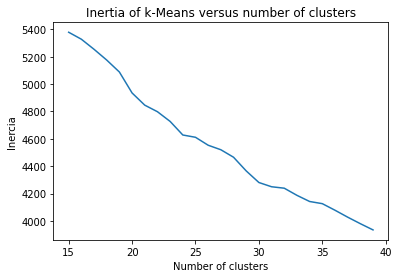

In [35]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a n clusters
# scores = [KMeans(n_clusters=i+2).fit(df).inertia_ for i in range(n)
from matplotlib import pyplot as plt
plt.plot(np.arange(15, 15+len(inercia)), inercia)
plt.xlabel('Number of clusters')
plt.ylabel("Inercia")
plt.title("Inertia of k-Means versus number of clusters")

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

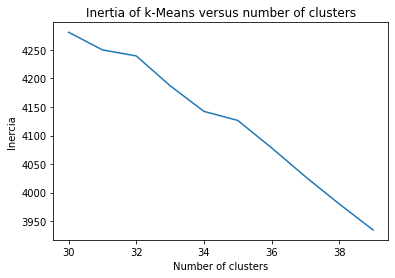

In [36]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a n clusters
# scores = [KMeans(n_clusters=i+2).fit(df).inertia_ for i in range(n)
from matplotlib import pyplot as plt
plt.plot(np.arange(30, 30+len(inercia[15:25])), inercia[15:25])
plt.xlabel('Number of clusters')
plt.ylabel("Inercia")
plt.title("Inertia of k-Means versus number of clusters")

In [37]:
num_clusters = 38
km = KMeans(n_clusters=num_clusters)
km.fit(pca_ind)

clusters = km.labels_.tolist()

In [38]:
# Para encontrar los centroides y analizarlos pueden utilizar lo siguiente:
centroids = km.cluster_centers_   # centroids = km.centroids
order_centroids = centroids.argsort()[:, ::-1]

In [39]:
# Calcular la métrica de la silueta. Pueden usar los módulos silhouette_samples y silhouette_score

silhouette_vals = silhouette_samples(df, clusters)

Para n_clusters = 30 El silhouette_score promedio es : 0.18512962510829906
Para n_clusters = 31 El silhouette_score promedio es : 0.18345223927124366
Para n_clusters = 32 El silhouette_score promedio es : 0.18914233138176556
Para n_clusters = 33 El silhouette_score promedio es : 0.18748233712346976
Para n_clusters = 34 El silhouette_score promedio es : 0.1870214476348736
Para n_clusters = 35 El silhouette_score promedio es : 0.18417282182494607
Para n_clusters = 36 El silhouette_score promedio es : 0.186685175978445
Para n_clusters = 37 El silhouette_score promedio es : 0.18835863807451245
Para n_clusters = 38 El silhouette_score promedio es : 0.19430855509016168
Para n_clusters = 39 El silhouette_score promedio es : 0.19426344561045433


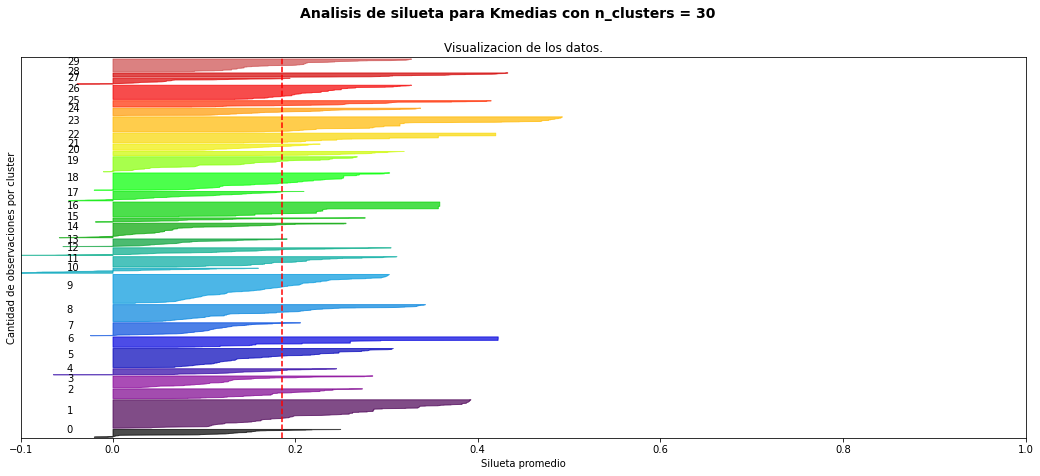

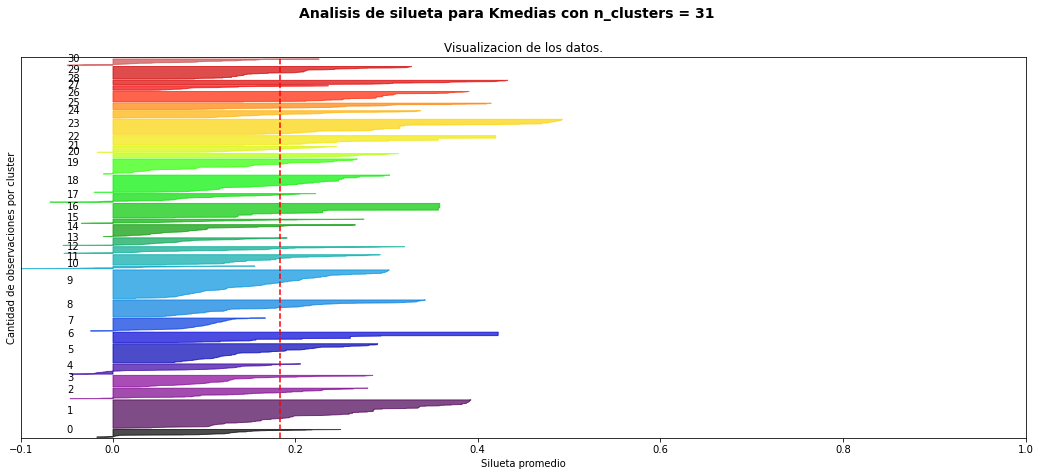

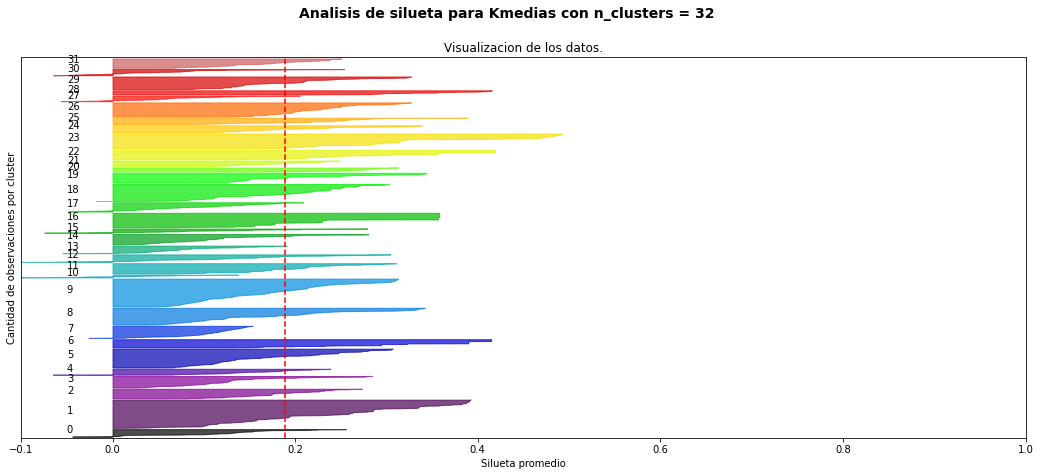

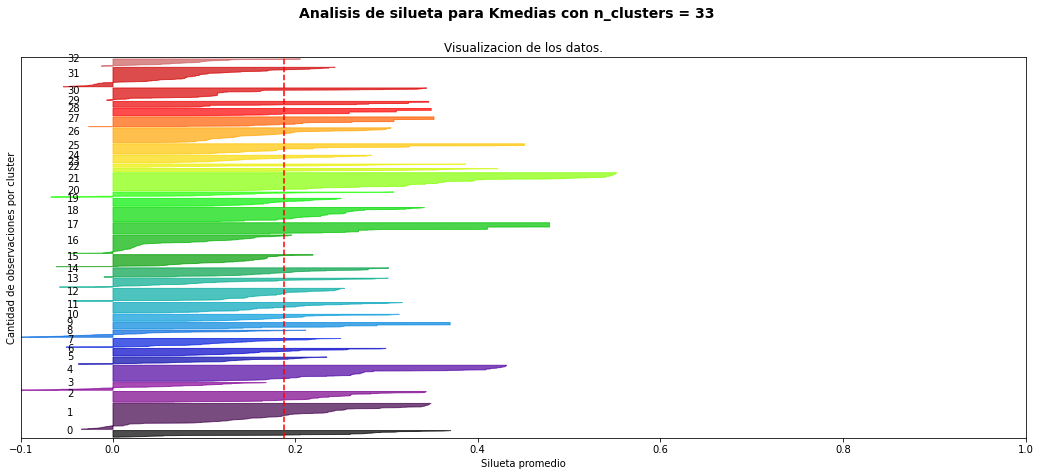

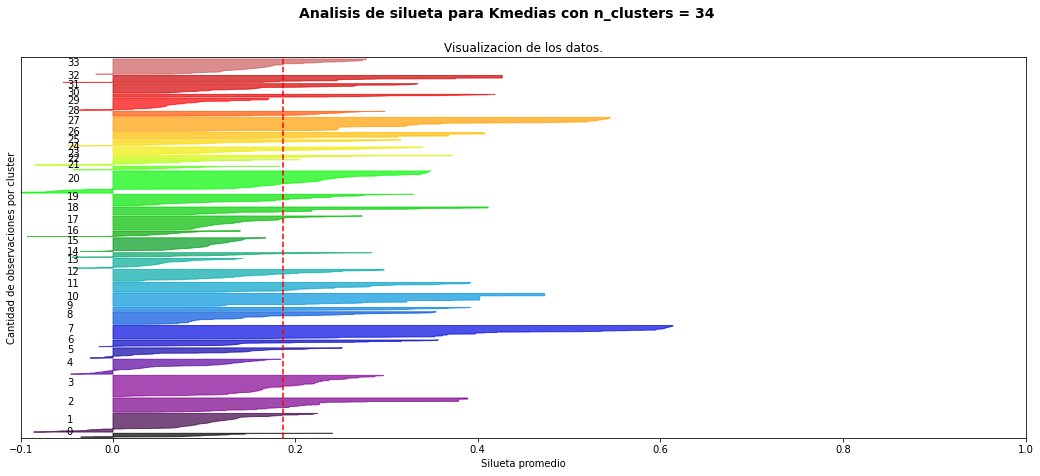

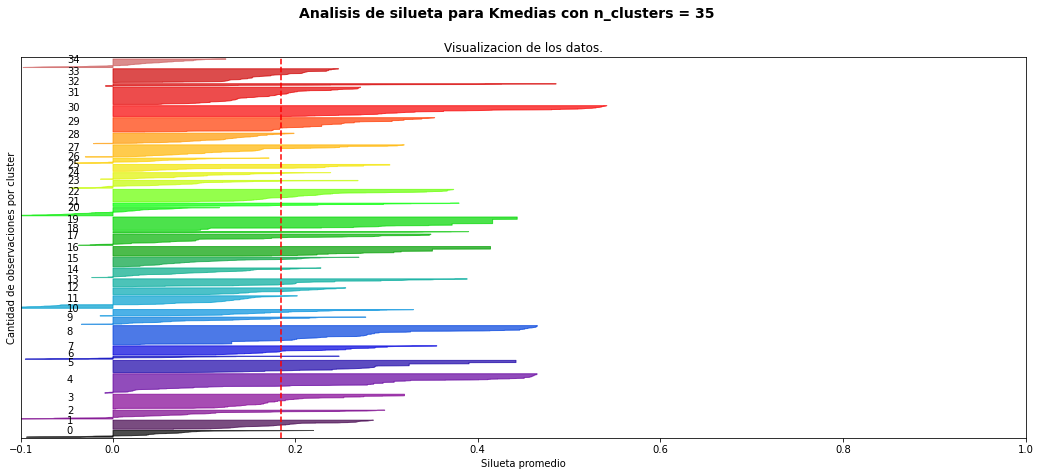

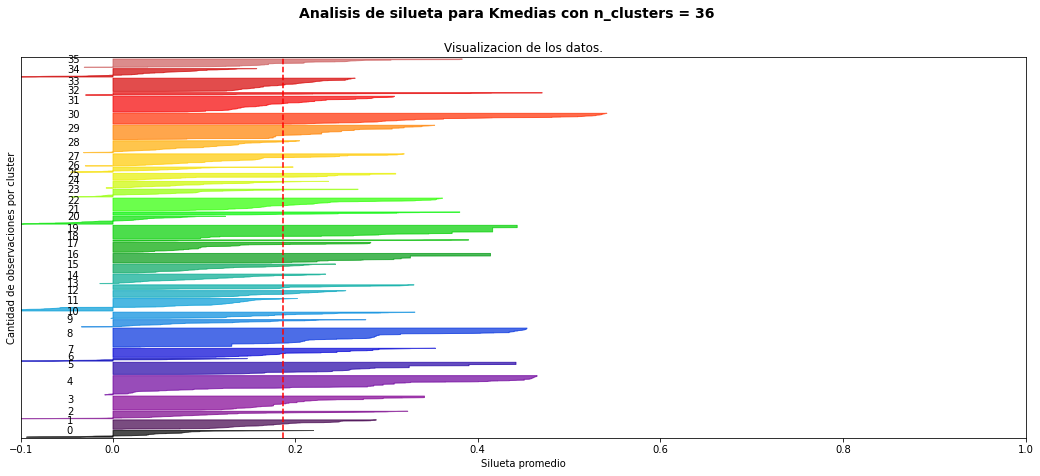

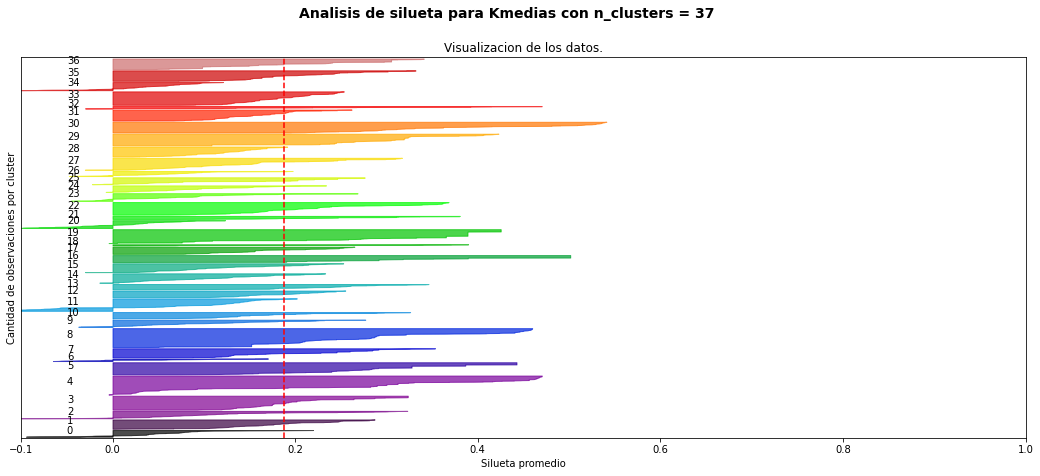

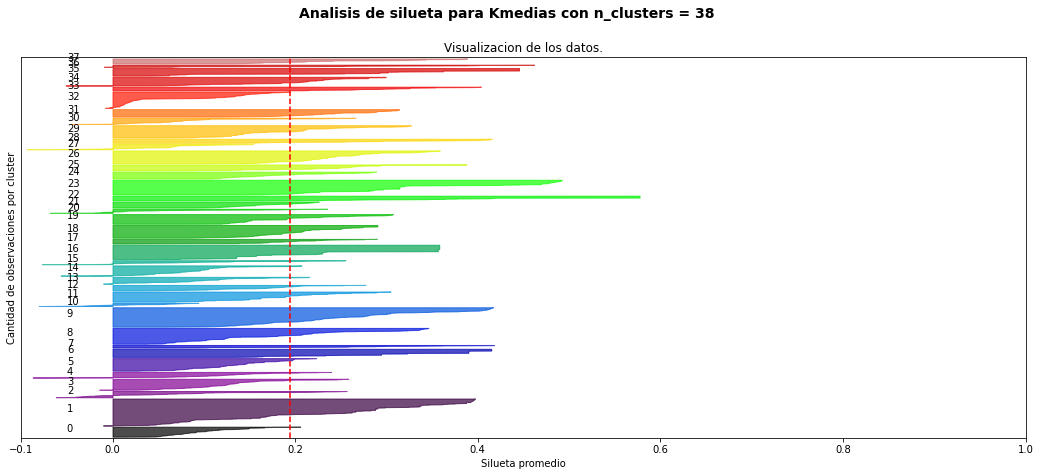

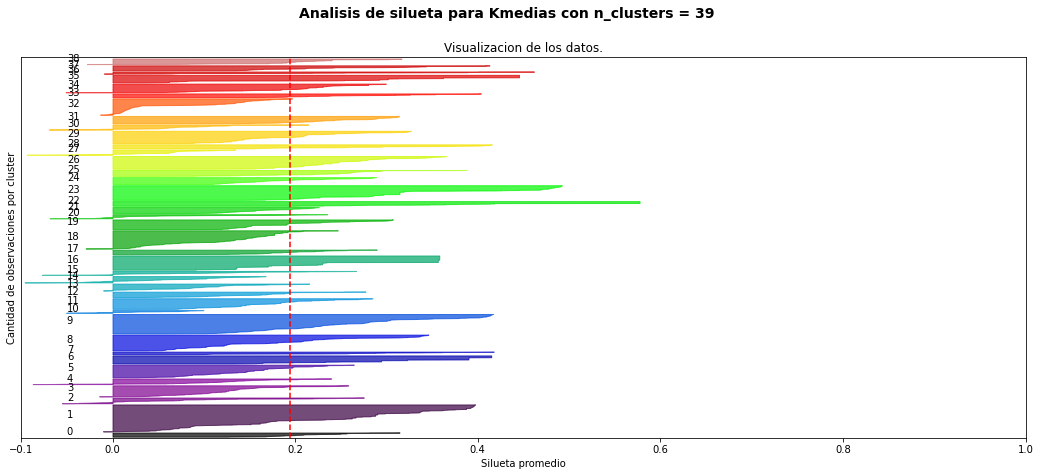

In [40]:
# Parece que el primer codo estaría entre 30 y 40 clusters. Vamos a profundizar el análisis entre esos datos.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


df_skills=pca_ind
range_n_clusters = list(range(30, 40)) #cantidad de clusters que vamos a evaluar
sse ={}
for n_clusters in range_n_clusters: #armamos el bucle for para iterar
    # Create a subplot with 1 row and 1 columns
    #Si quiero mas subplots tengo que agregar figuras (ax2) e incrementar las columnas subplots(1,2).
    # Esto nos generaría graficos que se muestran en paralelo.
    
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # Graficamos la silueta y definimos los límites del grafico. Como los valores negativos no nos interesan (solo nos)
    # intersa saber si los hay (porque esa clusterizacion no sirve) ponemos un limite inferior bajo, que nos
    # permite visualizar
    
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_skills) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_skills)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_skills, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_skills, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Silueta promedio")
    ax1.set_ylabel("Cantidad de observaciones por cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Analisis de silueta para Kmedias con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [43]:
def silueta (df, n_clusters):
    sse ={}
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    # Graficamos la silueta y definimos los límites del grafico. Como los valores negativos no nos interesan (solo nos)
    # intersa saber si los hay (porque esa clusterizacion no sirve) ponemos un limite inferior bajo, que nos
    # permite visualizar
    
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    sse[n_clusters] = clusterer.inertia_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("Para n_clusters =", n_clusters,"El silhouette_score promedio es :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Visualizacion de los datos.")
    ax1.set_xlabel("Silueta promedio")
    ax1.set_ylabel("Cantidad de observaciones por cluster")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Analisis de silueta para Kmedias con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
  
    return plt.show() 

Para n_clusters = 38 El silhouette_score promedio es : 0.19430855509016168


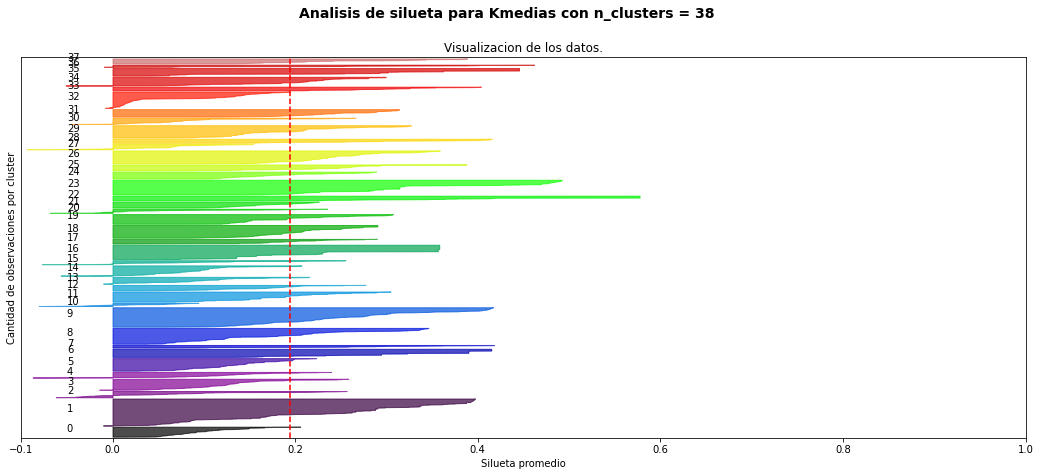

In [44]:
silueta(pca_ind, 38)

Graficar diferentes variables de interés por cluster y compararlos.

In [45]:
# Recuento del número de elementos en cada cluster
for i in range(num_clusters):
    print ('El cluster %i tiene %i elementos' % (i, clusters.count(i)))

El cluster 0 tiene 42 elementos
El cluster 1 tiene 123 elementos
El cluster 2 tiene 111 elementos
El cluster 3 tiene 49 elementos
El cluster 4 tiene 160 elementos
El cluster 5 tiene 77 elementos
El cluster 6 tiene 52 elementos
El cluster 7 tiene 73 elementos
El cluster 8 tiene 56 elementos
El cluster 9 tiene 92 elementos
El cluster 10 tiene 47 elementos
El cluster 11 tiene 92 elementos
El cluster 12 tiene 42 elementos
El cluster 13 tiene 56 elementos
El cluster 14 tiene 98 elementos
El cluster 15 tiene 205 elementos
El cluster 16 tiene 86 elementos
El cluster 17 tiene 182 elementos
El cluster 18 tiene 65 elementos
El cluster 19 tiene 27 elementos
El cluster 20 tiene 82 elementos
El cluster 21 tiene 25 elementos
El cluster 22 tiene 70 elementos
El cluster 23 tiene 51 elementos
El cluster 24 tiene 35 elementos
El cluster 25 tiene 92 elementos
El cluster 26 tiene 65 elementos
El cluster 27 tiene 37 elementos
El cluster 28 tiene 111 elementos
El cluster 29 tiene 114 elementos
El cluster 30

In [47]:
# Agrupar por clusters y clases los datasets, utilizando .count()
# Para utilizar la base de datos original usamos el DF ds
df2['cluster'] = clusters
df2['cluster'].value_counts()

15    205
17    182
4     160
32    145
1     123
29    114
28    111
2     111
33    100
14     98
9      92
11     92
25     92
34     91
37     87
16     86
20     82
5      77
7      73
22     70
18     65
26     65
36     57
13     56
8      56
6      52
23     51
3      49
10     47
31     45
12     42
0      42
27     37
24     35
30     34
19     27
21     25
35     24
Name: cluster, dtype: int64

In [55]:
df2.sample(5)

,nombre_depurado,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,...,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo,cluster
184155,panal m confort sec,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000063,0.000057,37
1628837,cafe molido super,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.001769,0.001870,26
1856601,medallones carne clasicos supercongelados,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.001156,0.001112,34
1540317,panal adulto mediano plenitud protect,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000254,0.000263,3
349738,mejillon aceite,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.001916,0.00

In [48]:
# Para poder graficar, tenemos que sumar las diferentes concreciones de las dummys para cada cluster
clusterizado=df2.groupby('cluster').sum()

In [49]:
clusterizado.head()

,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,dummy_premium,...,dummy_claro,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35,0,2,0,5,0,3,4,6,3,3,4,0,2,1,0,1,1,0,5,1,4,6,1,6,1,0,0,2,0,0,1,4,0,3,0,1,0,0,1,1,0,5,1,3,0,5,0,3,0,0,5,2,2,0,1,0,0,1,0,0,0,0,3,0,0,0,0,0,0,1,0,1,1,1,...,3,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,215,224,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,38,0,0,0,0,0,0,1,0,22,7,0.156850,0.166928
1,123,0,0,0,0,0,7,6,7,0,0,2,1,0,2,0,8,5,0,1,0,2,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,2,3,1,3,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,2,0,...,0,0,1,0,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,369,219,123,0,3,1,0,0,0,2,0,0,1,0,0,4,0,0,0,0,1,0,100,1,0,1,0,0,1,7,0,123,0,0.325355,0.341266
2,0,109,1,0,1,32,0,1,0,1,7,3,10,8,12,15,0,0,0,3,3,0,1,0,1,1,10,5,0,5,2,4,0,0,3,9,4,0,0,7,0,0,0,4,5,17,0,1,0,4,3,2,0,1,3,1,0,0,5,12,0,0,0,0,0,0,0,0,0,0,0,6,1,0,1,...,0,2,0,2,0,0,0,0,0,0,6,1,0,0,1,0,1,0,0,0,0,0,3,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,465,492,0,1,0,0,0,0,0,0,5,1,1,0,0,0,0,0,0,0,0,0,101,0,0,0,0,0,0,1,0,64,14,0.092133,0.094815
3,1,0,0,0,48,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,1,263,88,49,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,46,0,0,0,0,0,0,1,0,22,11,0.021812,0.023795
4,159,0,1,0,0,0,11,14,14,3,2,7,6,2,5,0,2,1,0,9,9,4,6,1,8,3,1,0,3,0,3,2,7,1,5,5,1,5,3,1,8,6,6,3,2,4,2,0,0,0,3,2,2,0,0,1,2,4,0,0,6,1,0,4,0,1,1,1,0,0,1,0,3,6,2,...,0,0,3,1,1,0,0,1,1,1,0,0,1,5,0,3,0,1,0,2,0,0,0,0,2,1,0,2,0,5,0,1,1,0,0,0,1,0,2,2,480,525,0,0,0,9,4,0,0,

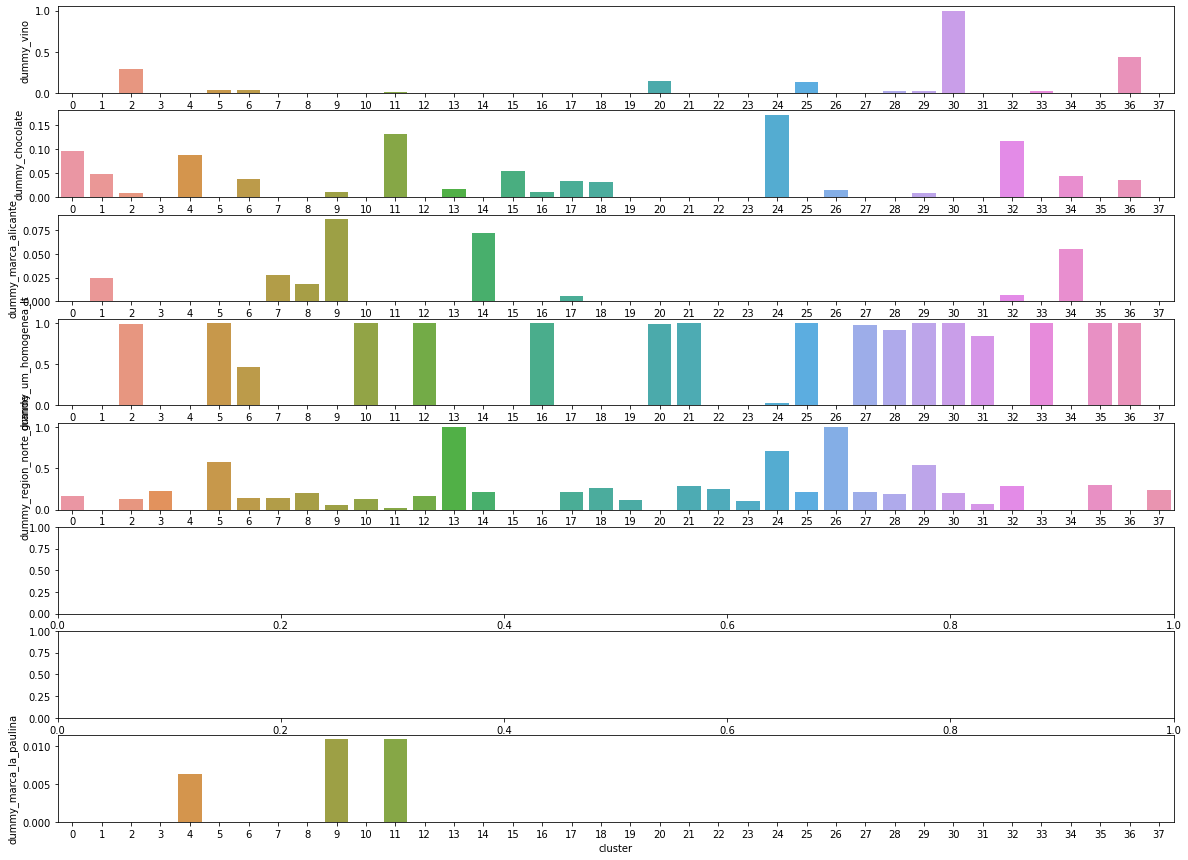

In [58]:
# Graficamos diferentes variables de los clusters utilizando un grafico de barras para ver las frecuencias.
import seaborn as sns
#sns.set_theme(style="ticks")
fig, (ax) = plt.subplots(8, 1, figsize=(20, 15))
ax[0] = sns.barplot(ax=ax[0], x="cluster", y="dummy_vino", data=df2, ci=None)
ax[1] = sns.barplot(ax=ax[1], x="cluster", y="dummy_chocolate", data=df2, ci=None)
ax[2] = sns.barplot(ax=ax[2], x="cluster", y="dummy_marca_alicante", data=df2, ci=None)
ax[3] = sns.barplot(ax=ax[3], x="cluster", y="dummy_um_homogenea_lt", data=df2, ci=None)
ax[4] = sns.barplot(ax=ax[4], x="cluster", y="dummy_region_norte_grande", data=df2, ci=None)
#ax[5] = sns.barplot(ax=ax[5], x="cluster", y="dummy_sucursal_tipo_supermercado", data=df2, ci=None)
#ax[6] = sns.barplot(ax=ax[6], x="cluster", y="dummy_region_cuyo", data=df2, ci=None)
ax[7] = sns.barplot(ax=ax[7], x="cluster", y="dummy_marca_la_paulina", data=df2, ci=None)

# con las variables arriba descriptas no logramos ver ninguna diferencia sustancial (en productos), pero si habría algo para explorar en marcas

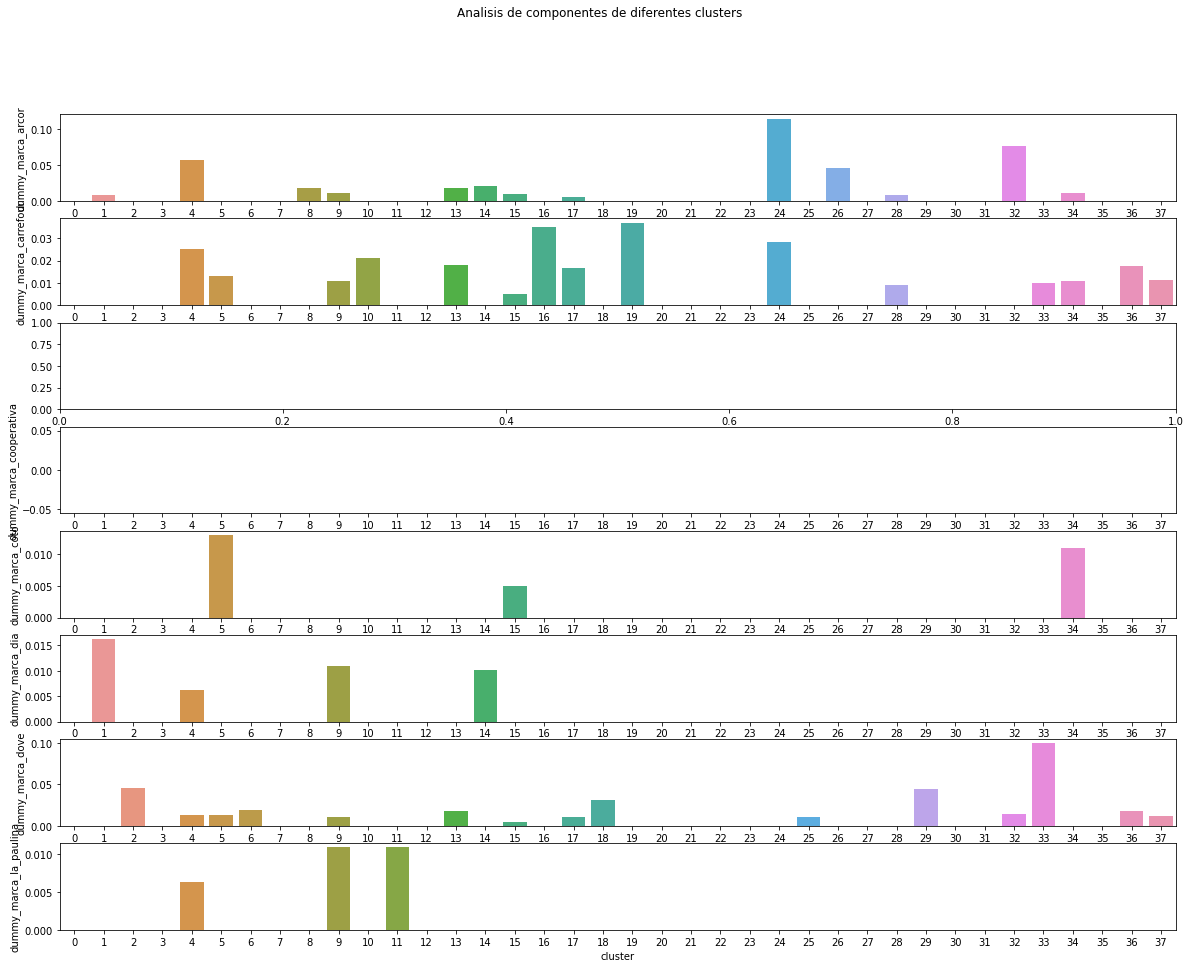

In [61]:
# Realizamos la exploración de la frecuencia de las marcas.
fig, (ax) = plt.subplots(8, 1, figsize=(20, 15))
fig.suptitle('Analisis de componentes de diferentes clusters')
ax[0] = sns.barplot(ax=ax[0], x="cluster", y="dummy_marca_arcor", data=df2, ci=None)
ax[1] = sns.barplot(ax=ax[1], x="cluster", y="dummy_marca_carrefour", data=df2, ci=None)
#ax[2] = sns.barplot(ax=ax[2], x="cluster", y="dummy_marca_colgate", data=df2, ci=None)
ax[3] = sns.barplot(ax=ax[3], x="cluster", y="dummy_marca_cooperativa", data=df2, ci=None)
ax[4] = sns.barplot(ax=ax[4], x="cluster", y="dummy_marca_coto", data=df2, ci=None)
ax[5] = sns.barplot(ax=ax[5], x="cluster", y="dummy_marca_dia", data=df2, ci=None)
ax[6] = sns.barplot(ax=ax[6], x="cluster", y="dummy_marca_dove", data=df2, ci=None)
ax[7] = sns.barplot(ax=ax[7], x="cluster", y="dummy_marca_la_paulina", data=df2, ci=None)

# Pareciera que las marcas si están mas segregadas por clusters.

In [63]:
from sklearn import (manifold, decomposition)

import time
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(df)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.052s...
[t-SNE] Computed neighbors for 3000 samples in 2.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.022036
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.505051
[t-SNE] KL divergence after 1000 iterations: 1.022695
t-SNE done! Time elapsed: 11.421110153198242 seconds


In [64]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns



In [66]:
# Graficamos en el espacio t-sne

df_tsne = X_tsne
graf1 = go.Scatter(x=df_tsne[:,0], y=df_tsne[:,1],
                           mode='markers',
                        text=df2.loc[:,'cluster'],
                           marker=dict(
                                size=5,
                                 color = np.array(df2.cluster), )
                           )

data=[graf1]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
plot(fig)

'temp-plot.html'

### 3.  HDBScan en cada cluster para detectar anomalías.

In [ ]:
#!pip install hdbscan

In [ ]:
#import hdbscan
#clusterer = hdbscan.HDBSCAN(metric='manhattan')
#clusterer.fit(df)
#clusterer.labels_
#clusterer.probabilities_

In [68]:
df2.sample(2)

,nombre_depurado,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,...,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo,cluster
592054,salsa pesto deshidratada,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.016406,0.016856,34
216799,mermelada damasco diet bc g,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000812,0.000812,9


In [69]:
df['cluster'] = df2.cluster

In [70]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=20,
                            min_samples=5, 
                            gen_min_span_tree=True,
                            metric='manhattan',
                            algorithm ='boruvka_kdtree',
                            cluster_selection_epsilon = 0.5,
                            cluster_selection_method='eom')
hdb = clusterer.fit(df)
hdb_labels = hdb.labels_
hdb_prob = hdb.probabilities_

In [71]:
hdb_labels.shape, hdb_prob.shape

((3000,), (3000,))

In [72]:
np.unique(hdb_prob)

array([0.        , 0.00122397, 0.00122534, ..., 0.99999843, 0.99999971,
       1.        ])

In [73]:
np.unique(hdb_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33])

In [74]:
df['hdbscan_label'] = hdb_labels

In [75]:
df['hdbscan_probabilities'] = hdb_prob

In [77]:
df.groupby('hdbscan_label').precioRelativo.count().reset_index(name='q_clusters').sort_values(['q_clusters'],ascending=False)

,hdbscan_label,q_clusters
0,-1,586
14,13,235
27,26,183
23,22,124
13,12,123
17,16,118
7,6,103
18,17,99
30,29,97
19,18,91


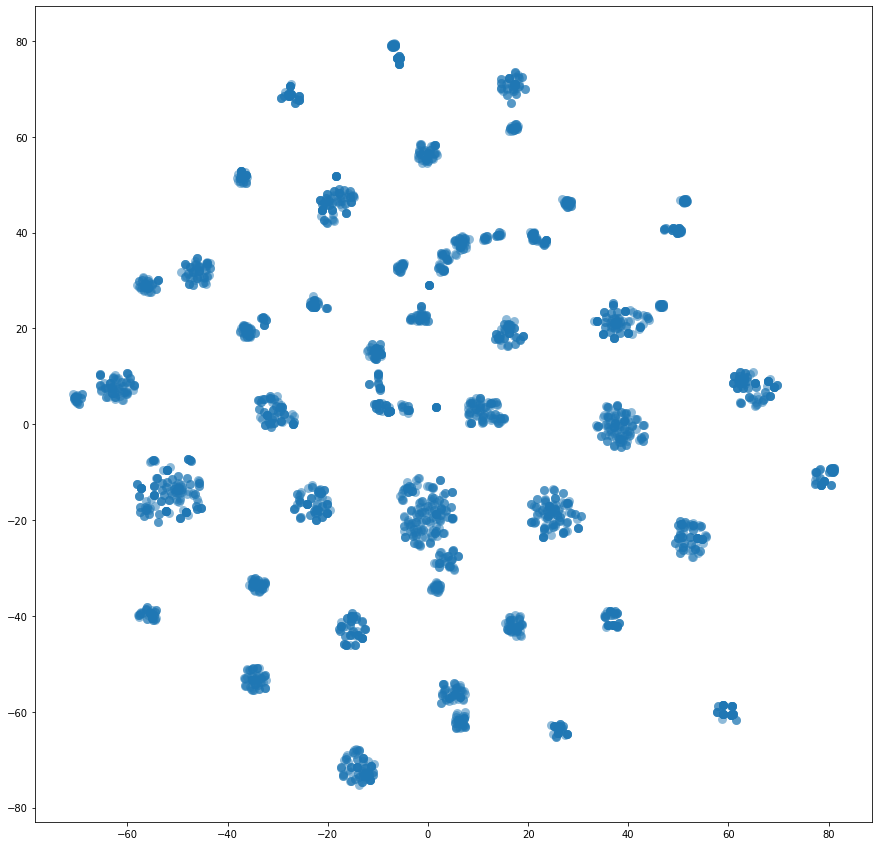

In [78]:
from sklearn import (manifold, decomposition)
plt.figure(figsize=(15,15))


plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
projection = manifold.TSNE().fit_transform(df)
plt.scatter(*projection.T, **plot_kwds)

In [81]:
cant_cluster = len(np.unique(hdb_labels))
cant_cluster

35

In [82]:
color_palette = sns.color_palette('Paired', cant_cluster)

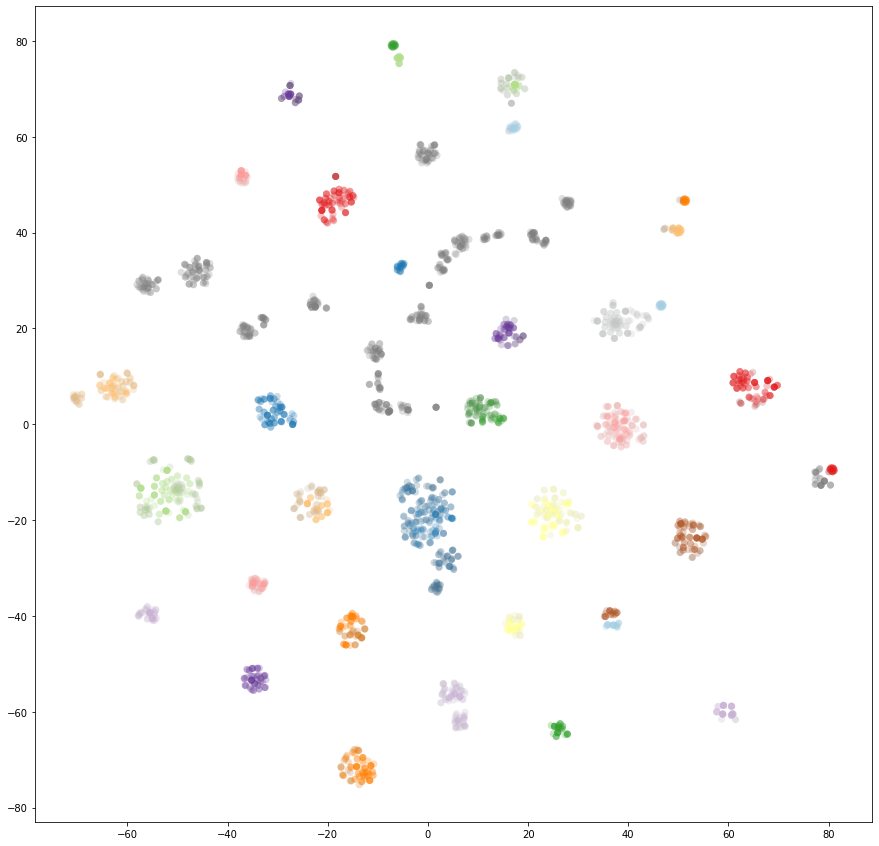

In [83]:
plt.figure(figsize=(15,15))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdb_labels]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdb_prob)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

<AxesSubplot:ylabel='$\\lambda$ value'>

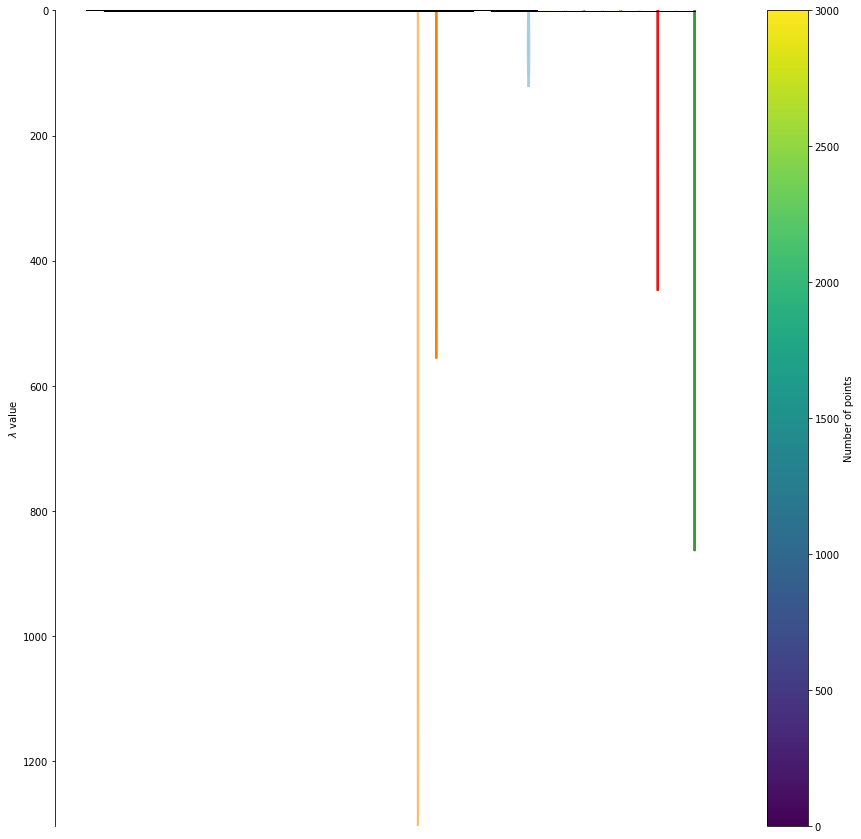

In [85]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=color_palette)

In [86]:
import networkx
g = clusterer.condensed_tree_.to_networkx()
g.number_of_nodes()

3067

In [87]:
clusterer.condensed_tree_.to_pandas().head()

,parent,child,lambda_val,child_size
0,3000,2486,0.090906,1
1,3000,581,0.099936,1
2,3000,411,0.099986,1
3,3000,1589,0.099986,1
4,3000,2323,0.099994,1


In [88]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]

<AxesSubplot:ylabel='distance'>

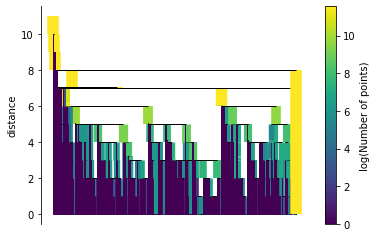

In [89]:
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [90]:
from sklearn.metrics.pairwise import pairwise_distances

distance_matrix = pairwise_distances(df)
clusterer = hdbscan.HDBSCAN(min_cluster_size=20,
                            min_samples=5, 
                            gen_min_span_tree=True,
                            metric='precomputed',
                            #cluster_selection_epsilon = 0.5,
                            cluster_selection_method='eom',
                            allow_single_cluster=False)#,
                            #prediction_data=True)#eom;leaf)

hdb = clusterer.fit(distance_matrix)
hdb_labels = hdb.labels_
hdb_prob = hdb.probabilities_

In [91]:
np.unique(hdb_prob)

array([0.        , 0.00138967, 0.00138968, ..., 1.        , 1.        ,
       1.        ])

In [92]:
np.unique(hdb_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41])

In [93]:
df['hdbscan_label'] = hdb_labels

In [94]:
df['hdbscan_probabilities'] = hdb_prob

In [96]:
df.groupby('hdbscan_label').precioRelativo.count().reset_index(name='q_clusters').sort_values(['q_clusters'],ascending=False)

,hdbscan_label,q_clusters
5,4,235
23,22,183
40,39,163
6,5,162
3,2,124
16,15,118
38,37,117
10,9,103
35,34,102
20,19,99


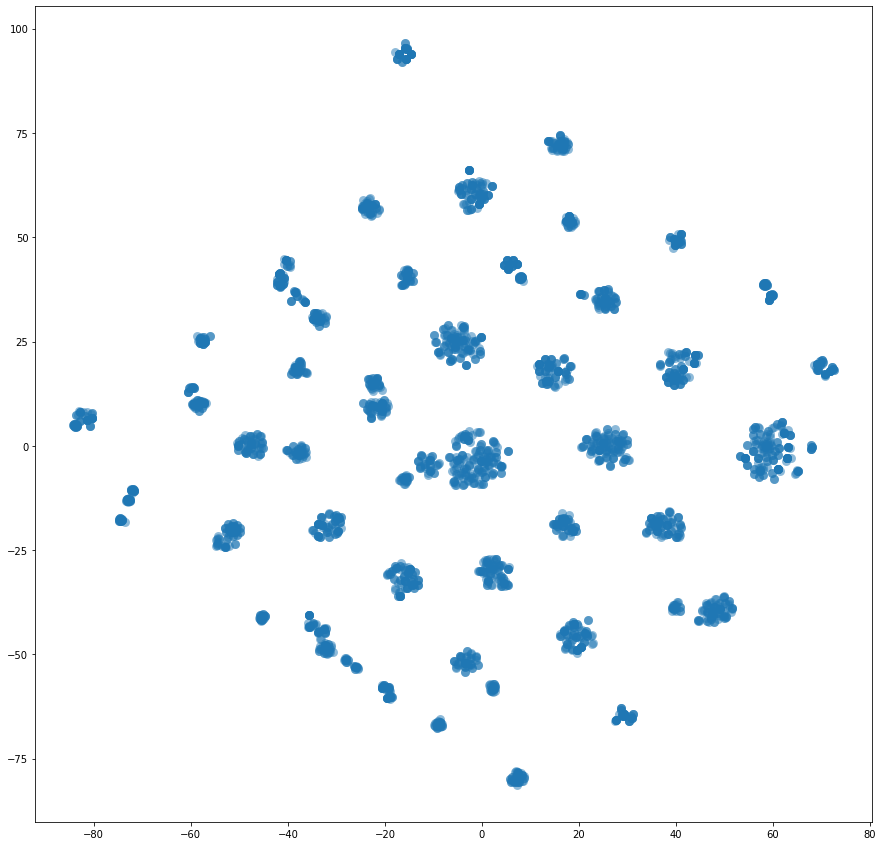

In [97]:
from sklearn import (manifold, decomposition)
plt.figure(figsize=(15,15))


plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
projection = manifold.TSNE().fit_transform(df)
plt.scatter(*projection.T, **plot_kwds)

In [98]:
cant_cluster = len(np.unique(hdb_labels))

In [99]:
color_palette = sns.color_palette('Paired', cant_cluster)

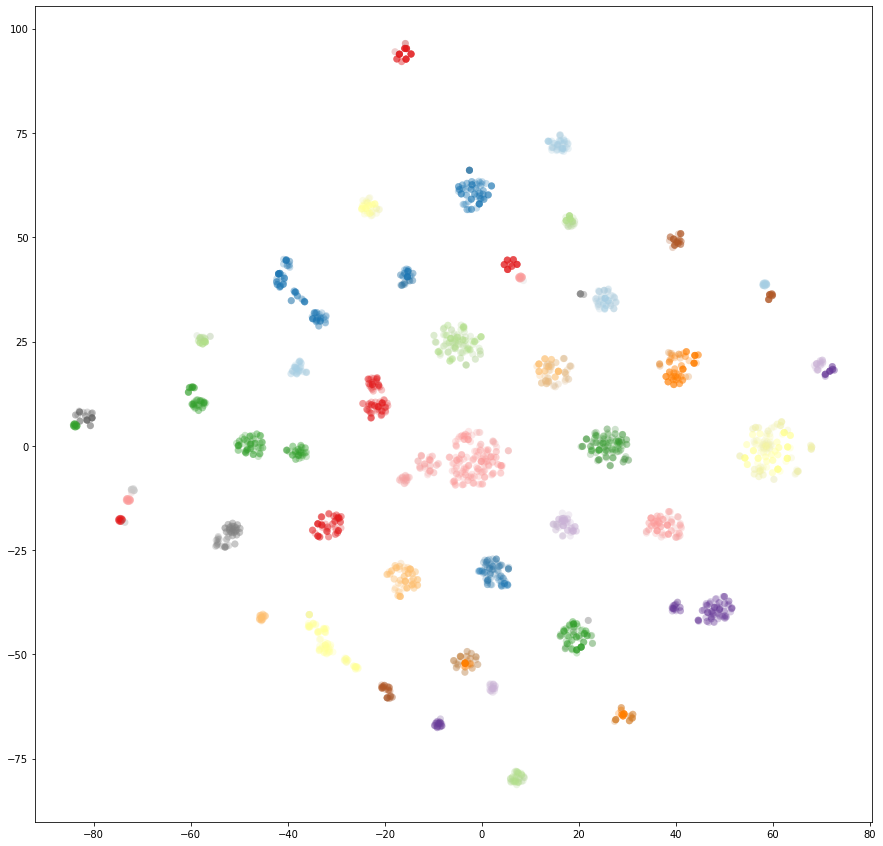

In [100]:
plt.figure(figsize=(15,15))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdb_labels]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdb_prob)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

<AxesSubplot:ylabel='$\\lambda$ value'>

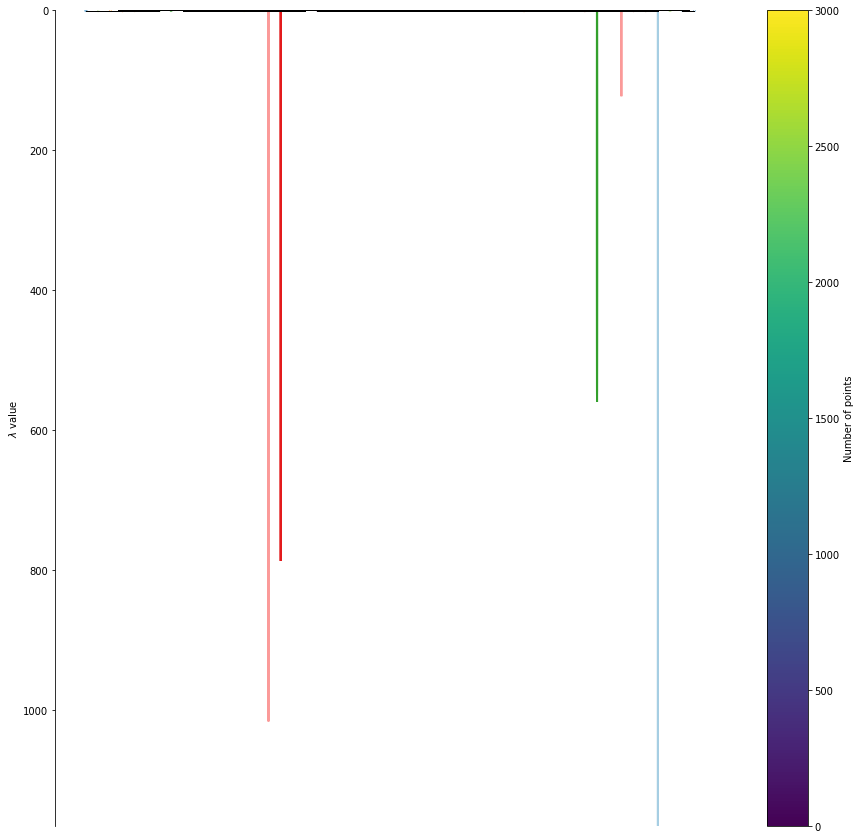

In [101]:
plt.figure(figsize=(15,15))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=color_palette)

In [102]:
import networkx
g = clusterer.condensed_tree_.to_networkx()
g.number_of_nodes()

3101

In [103]:
clusterer.condensed_tree_.to_pandas().head()


,parent,child,lambda_val,child_size
0,3000,3001,0.103695,2897
1,3000,3002,0.103695,103
2,3001,3003,0.119310,1384
3,3001,3004,0.119310,1513
4,3002,3005,0.301511,60


In [104]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]

<AxesSubplot:ylabel='distance'>

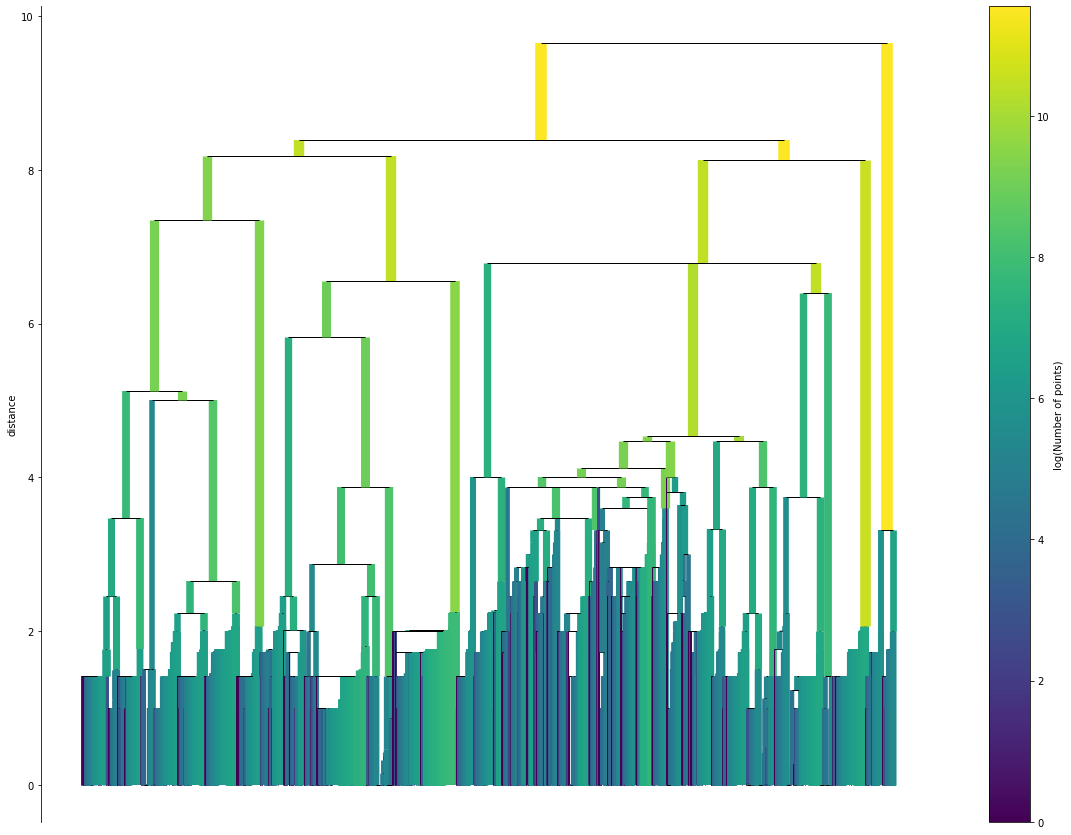

In [105]:
plt.figure(figsize=(20,15))
clusterer.single_linkage_tree_.plot()

<AxesSubplot:ylabel='distance'>

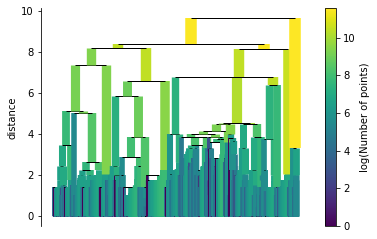

In [106]:
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

In [107]:
df2.sample(5)

,nombre_depurado,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,...,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo,cluster
516163,agua mineral gas,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000082,0.000085,5
1834301,albahaca desecada,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.003971,0.004080,14
1937719,mix energetico,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.003363,0.003380,15
1563603,vino tinto cabernet sauvignon,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000971,0.001055,2
759205,limpiador continuo inodoros manana campo repuesto,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.006372,0.008025,

In [109]:
df.sample(5)

,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_crema,dummy_jabon,dummy_blanco,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_te,dummy_coloracion,dummy_cerveza,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_esponja,dummy_dental,dummy_novillito,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,dummy_premium,...,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_norte_grande,precioRelativo,priorPrecioRelativo,cluster,hdbscan_label,hdbscan_probabilities
1034536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000117,0.000126,2,1,0.801790
69295,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.001569,0.001569,17,4,0.982276
1081436,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.000624,0.000641,6,24,0.935426
597613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.001949,0.002003,25,9,0.990463
355277,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.002191,0.002364,29,6,1.000000


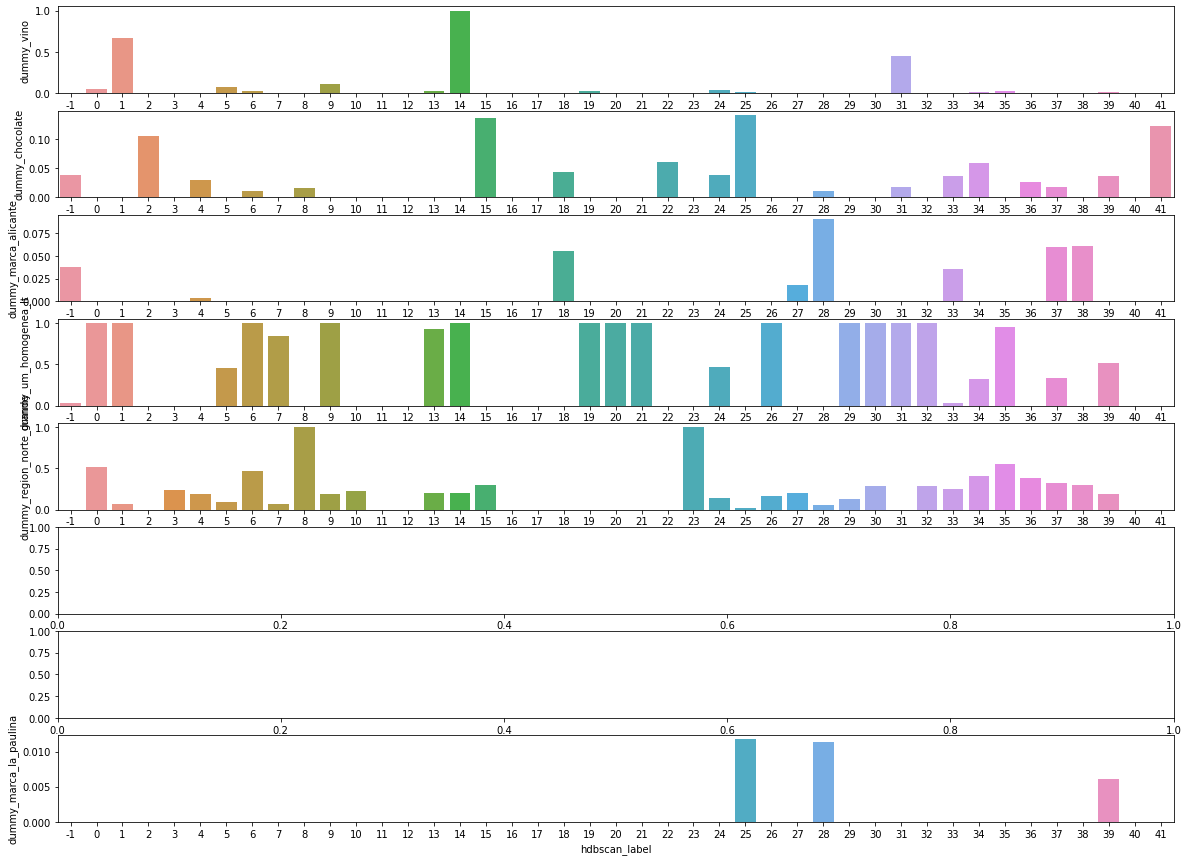

In [110]:
# Graficamos diferentes variables de los clusters utilizando un grafico de barras para ver las frecuencias.
import seaborn as sns
#sns.set_theme(style="ticks")
fig, (ax) = plt.subplots(8, 1, figsize=(20, 15))
ax[0] = sns.barplot(ax=ax[0], x="hdbscan_label", y="dummy_vino", data=df, ci=None)
ax[1] = sns.barplot(ax=ax[1], x="hdbscan_label", y="dummy_chocolate", data=df, ci=None)
ax[2] = sns.barplot(ax=ax[2], x="hdbscan_label", y="dummy_marca_alicante", data=df, ci=None)
ax[3] = sns.barplot(ax=ax[3], x="hdbscan_label", y="dummy_um_homogenea_lt", data=df, ci=None)
ax[4] = sns.barplot(ax=ax[4], x="hdbscan_label", y="dummy_region_norte_grande", data=df, ci=None)
#ax[5] = sns.barplot(ax=ax[5], x="cluster", y="dummy_sucursal_tipo_supermercado", data=df2, ci=None)
#ax[6] = sns.barplot(ax=ax[6], x="cluster", y="dummy_region_cuyo", data=df2, ci=None)
ax[7] = sns.barplot(ax=ax[7], x="hdbscan_label", y="dummy_marca_la_paulina", data=df, ci=None)

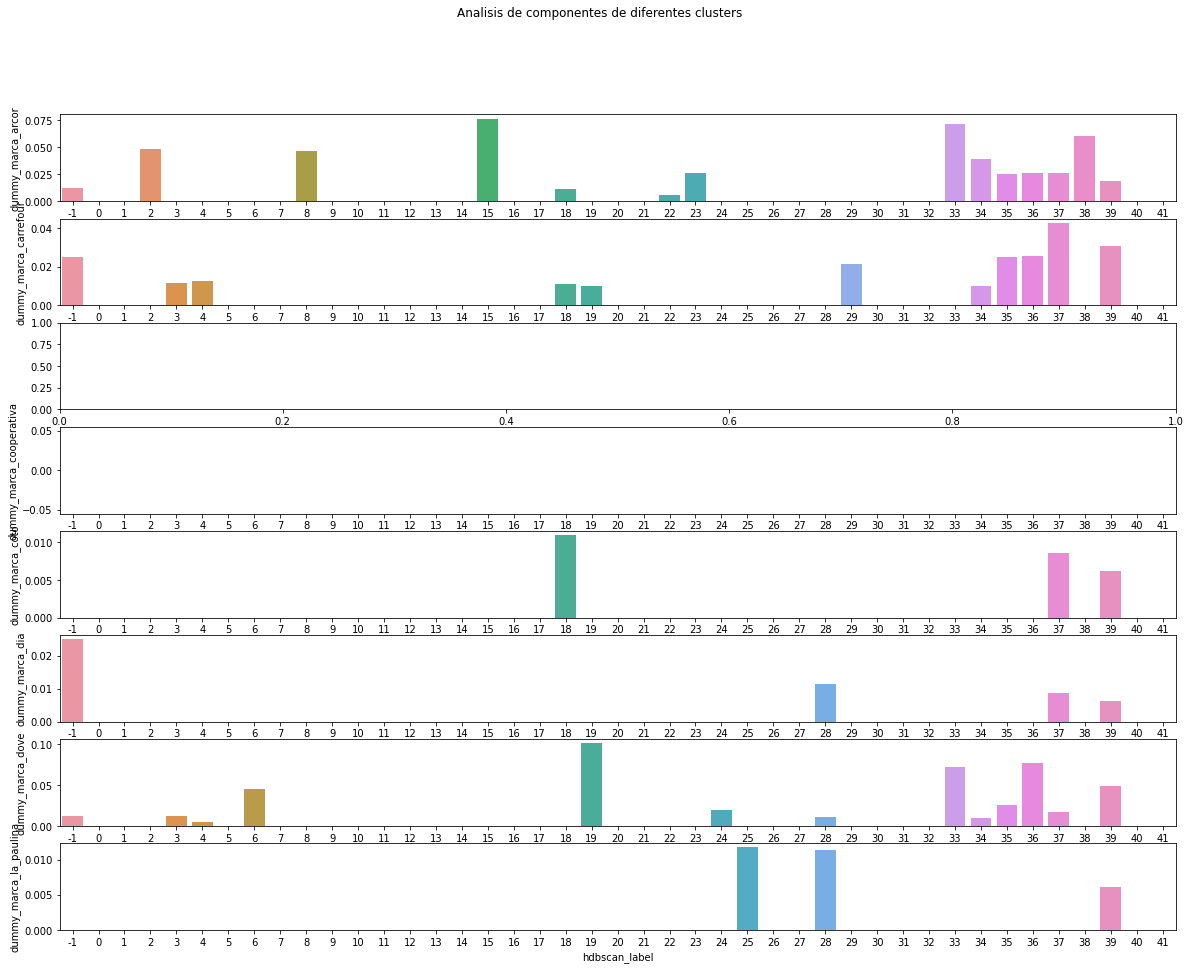

In [111]:
# Realizamos la exploración de la frecuencia de las marcas.
fig, (ax) = plt.subplots(8, 1, figsize=(20, 15))
fig.suptitle('Analisis de componentes de diferentes clusters')
ax[0] = sns.barplot(ax=ax[0], x="hdbscan_label", y="dummy_marca_arcor", data=df, ci=None)
ax[1] = sns.barplot(ax=ax[1], x="hdbscan_label", y="dummy_marca_carrefour", data=df, ci=None)
#ax[2] = sns.barplot(ax=ax[2], x="cluster", y="dummy_marca_colgate", data=df2, ci=None)
ax[3] = sns.barplot(ax=ax[3], x="hdbscan_label", y="dummy_marca_cooperativa", data=df, ci=None)
ax[4] = sns.barplot(ax=ax[4], x="hdbscan_label", y="dummy_marca_coto", data=df, ci=None)
ax[5] = sns.barplot(ax=ax[5], x="hdbscan_label", y="dummy_marca_dia", data=df, ci=None)
ax[6] = sns.barplot(ax=ax[6], x="hdbscan_label", y="dummy_marca_dove", data=df, ci=None)
ax[7] = sns.barplot(ax=ax[7], x="hdbscan_label", y="dummy_marca_la_paulina", data=df, ci=None)


### III. Opcional - Tareas Adicionales